### Nama : Thifa Ziada Taqiyya
### NIM : 24060121130080
### Tugas 6 - Priciple Component Analysis
### Nama Dataset : Thyroid Disease
### Link Dataset : https://archive.ics.uci.edu/dataset/102/thyroid+disease


In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

Kode di atas mengimport beberapa library yang diperlukan, yaitu pandas (sebagai pd), numpy (sebagai np), matplotlib.pyplot (sebagai plt), serta modul preprocessing dan decomposition dari scikit-learn untuk standarisasi data dan analisis komponen utama (PCA) secara berurutan. Pernyataan %matplotlib inline digunakan untuk memastikan bahwa plot hasil visualisasi akan ditampilkan secara langsung di notebook.

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/new-thyroid.data"
names = ['class', 't3_resin', 'total_thyroxin', 'total_t3', 'basal_tsh', 'diff_tshvalue']
dataset = pd.read_csv(url, names=names)

Kode di atas menggunakan library pandas untuk mengambil dataset thyroid disease. Dataset ini berisi informasi mengenai beberapa parameter klinis terkait tiroid, seperti t3_resin, total_thyroxin, total_t3, basal_tsh, dan diff_tshvalue. Setelah mengambil dataset, kode tersebut membaca dan memuatnya ke dalam struktur data DataFrame menggunakan fungsi read_csv dari pandas. Nama-nama kolom dataset ditentukan oleh list 'names', yaitu 'class', 't3_resin', 'total_thyroxin', 'total_t3', 'basal_tsh', dan 'diff_tshvalue'.






In [18]:
print(dataset.shape)
print(dataset[:10])
print(np.unique(dataset['class']))

(215, 6)
   class  t3_resin  total_thyroxin  total_t3  basal_tsh  diff_tshvalue
0      1       107            10.1       2.2        0.9            2.7
1      1       113             9.9       3.1        2.0            5.9
2      1       127            12.9       2.4        1.4            0.6
3      1       109             5.3       1.6        1.4            1.5
4      1       105             7.3       1.5        1.5           -0.1
5      1       105             6.1       2.1        1.4            7.0
6      1       110            10.4       1.6        1.6            2.7
7      1       114             9.9       2.4        1.5            5.7
8      1       106             9.4       2.2        1.5            0.0
9      1       107            13.0       1.1        0.9            3.1
[1 2 3]



Hasil output pertama menunjukkan bentuk (shape) dari dataset, yaitu (215, 6), yang berarti terdapat 215 baris dan 6 kolom dalam dataset tersebut. Output kedua mencetak sepuluh baris pertama dari dataset, memberikan gambaran awal mengenai nilai-nilai dalam setiap kolom. Kolom 'class' menyatakan kategori penyakit tiroid, sedangkan kolom-kolom lainnya seperti 't3_resin', 'total_thyroxin', 'total_t3', 'basal_tsh', dan 'diff_tshvalue' menyajikan informasi klinis terkait tiroid.

Selanjutnya, output ketiga menampilkan nilai unik dalam kolom 'class', yang berisi angka 1, 2, dan 3. Angka-angka tersebut mungkin merepresentasikan kategori-kategori tertentu terkait jenis penyakit tiroid pada dataset ini. Dengan informasi ini, pengguna dapat memahami struktur dasar dari dataset dan memulai analisis lebih lanjut untuk memahami hubungan antara variabel-variabel dalam konteks penyakit tiroid.

#### Standarisasi Data

In [5]:
features = ['t3_resin', 'total_thyroxin', 'total_t3', 'basal_tsh', 'diff_tshvalue']
x = dataset.loc[:, features].values
y = dataset.loc[:,['class']].values
x = StandardScaler().fit_transform(x)

Kode di atas bertujuan untuk menyiapkan data untuk proses analisis lebih lanjut. Dalam langkah pertama, variabel features didefinisikan sebagai daftar yang berisi nama-nama kolom yang akan digunakan sebagai fitur dalam analisis, yaitu 't3_resin', 'total_thyroxin', 'total_t3', 'basal_tsh', dan 'diff_tshvalue'. Selanjutnya, variabel x dibentuk dengan mengambil nilai-nilai dari kolom-kolom fitur tersebut dalam DataFrame dataset. Demi konsistensi dan interpretasi yang lebih baik, nilai-nilai fitur tersebut kemudian di-standarisasi menggunakan fungsi StandardScaler dari scikit-learn.

Di samping itu, variabel y dibentuk dengan mengambil nilai dari kolom 'class' sebagai target atau variabel respons dalam analisis. Proses ini merupakan langkah awal yang umum dalam pemrosesan data sebelum menerapkan model pembelajaran mesin atau melakukan analisis statistik. Standarisasi fitur-fitur dapat membantu memastikan bahwa variabilitas dalam skala tidak memengaruhi hasil analisis secara tidak seimbang.

Setelah sudah dilakukan standarisasi maka data sudah siap untuk diolah dengan algoritma PCA. proses PCA selanjutnya biasanya melibatkan perhitungan matriks kovarian, ekstraksi nilai eigen, dan proyeksi data ke ruang dimensi yang lebih rendah menggunakan komponen utama yang dihasilkan

In [19]:
print(x.shape)
print(y.shape)
print(x[:10])
print(y[:10])

(215, 5)
(215, 1)
[[-0.19789404  0.0630222   0.10575442 -0.32438883 -0.18617988]
 [ 0.25960294  0.02034575  0.74126623 -0.14417281  0.21125033]
 [ 1.32709588  0.6604925   0.24697927 -0.24247246 -0.44699346]
 [-0.04539505 -0.9612126  -0.31792012 -0.24247246 -0.33521621]
 [-0.35039303 -0.5344481  -0.38853255 -0.22608918 -0.53393132]
 [-0.35039303 -0.7905068   0.035142   -0.24247246  0.34786697]
 [ 0.03085445  0.12703687 -0.31792012 -0.20970591 -0.18617988]
 [ 0.33585243  0.02034575  0.24697927 -0.22608918  0.18641094]
 [-0.27414354 -0.08634538  0.10575442 -0.22608918 -0.52151162]
 [-0.19789404  0.68183073 -0.67098224 -0.32438883 -0.1365011 ]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


#### Proyeksi PCA ke 2D
Diketahui bahwa data asli memiliki 5 kolom (t3_resin, total_thyroxin, total_t3, basal_tsh, diff_tshvalue). Pada bagian ini kode memproyeksikan data asli yang 5 dimensi menjadi 2 dimensi

In [29]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2'])

Kode di atas mengimplementasikan analisis komponen utama (PCA) pada matriks fitur x yang telah di-standarisasi. Pertama, objek PCA dengan parameter n_components=2 dibuat, yang mengindikasikan bahwa analisis komponen utama akan menghasilkan dua komponen utama sebagai representasi baru dari data. Selanjutnya, fungsi fit_transform dari objek PCA digunakan untuk mentransformasikan matriks fitur x ke dalam ruang berdimensi lebih rendah, yang kemudian disimpan dalam variabel principalComponents.

Hasil transformasi ini disusun dalam suatu DataFrame baru, principalDf, yang memiliki dua kolom, 'principal component 1' dan 'principal component 2'. DataFrame ini dapat digunakan untuk visualisasi data dalam ruang berdimensi dua, di mana setiap baris merepresentasikan suatu observasi dalam bentuk dua komponen utama tersebut. Proses PCA membantu mereduksi dimensi data, menggambarkan variasi yang signifikan dalam dataset, dan memfasilitasi interpretasi visual yang lebih sederhana dalam analisis data.

In [30]:
finalDf = pd.concat([principalDf, dataset[['class']]], axis = 1)

In [31]:
finalDf.head()

,principal component 1,principal component 2,class
0,-0.369771,-0.174168,1
1,-0.222660,0.323880,1
2,-0.145453,-0.538760,1
3,0.411900,-0.643836,1
4,0.015772,-0.620086,1


Kode di atas membuat DataFrame baru yang disebut finalDf dengan menggabungkan hasil transformasi PCA (principalDf) dan kolom 'class' dari DataFrame asli (dataset). Fungsi pd.concat digunakan untuk menggabungkan dua DataFrame, yaitu principalDf yang berisi dua komponen utama hasil PCA, dan kolom 'class' dari DataFrame asli yang berisi kategori penyakit tiroid.

Dengan parameter axis=1, penggabungan dilakukan secara horizontal (sepanjang kolom). Hasilnya, DataFrame finalDf terdiri dari tiga kolom: 'principal component 1', 'principal component 2', dan 'class'. DataFrame ini dapat digunakan untuk melakukan visualisasi atau analisis lebih lanjut, dengan mengintegrasikan informasi hasil PCA dengan label kategori penyakit tiroid untuk setiap observasi dalam dataset. Proses ini membantu pemahaman visual terhadap distribusi dan pola data dalam ruang berdimensi dua berdasarkan dua komponen utama.

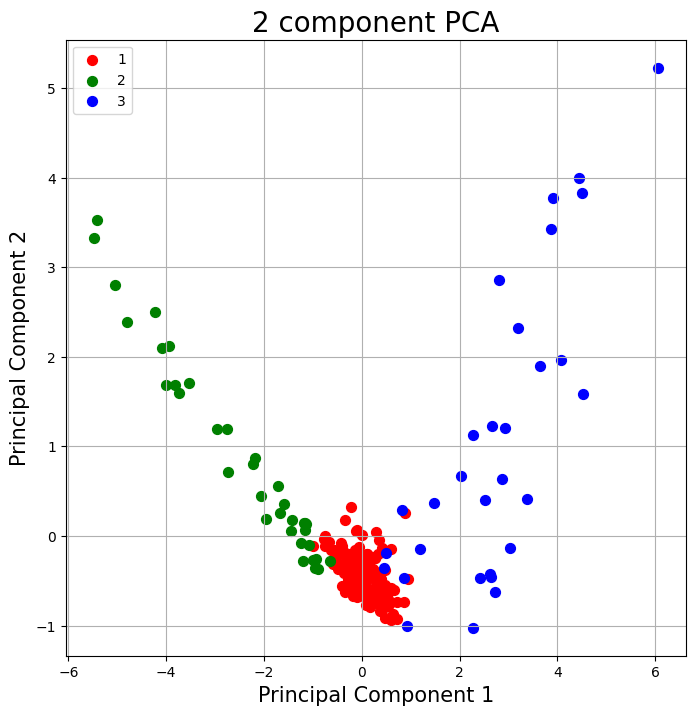

In [32]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot (1,1,1)
ax.set_xlabel ('Principal Component 1', fontsize = 15)
ax.set_ylabel ('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [ 1, 2, 3]
colors = ['r','g','b']
for target, color in zip(targets,colors):
  indicesToKeep = finalDf['class'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
  , finalDf.loc[indicesToKeep, 'principal component 2']
  , c= color
  , s = 50)
ax.legend (targets)
ax.grid()

Kode di atas digunakan untuk membuat plot dua dimensi dari hasil transformasi PCA. Sebuah figure dengan ukuran 8x8 dibuat, dan sebuah subplot ditambahkan ke dalamnya. Label sumbu x dan y ditetapkan sebagai 'Principal Component 1' dan 'Principal Component 2', sedangkan judul plot diberi nama '2 component PCA'.

Selanjutnya, dilakukan penggambaran titik-titik pada plot untuk setiap kategori penyakit tiroid (1, 2, dan 3) menggunakan warna merah, hijau, dan biru. Dalam loop, setiap kategori diberi label dan ditentukan dengan warna yang sesuai. Scatter plot digunakan untuk menunjukkan distribusi data hasil PCA dalam ruang dua dimensi.

Pada akhirnya, legend ditambahkan ke plot untuk menandakan setiap kategori, dan grid ditampilkan untuk mempermudah interpretasi visual. Visualisasi ini memberikan gambaran bagaimana data terdistribusi dalam dua komponen utama hasil PCA, memungkinkan pemahaman yang lebih baik tentang pola dan hubungan antar-observasi dalam dataset penyakit tiroid.

In [33]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


[0.53607135 0.20542603]
0.7414973811834986


Kode tersebut mencetak nilai rasio varians yang dijelaskan oleh setiap pca. Dalam kasus ini, komponen utama pertama (Principal Component 1) mampu menjelaskan sekitar 53.61% varians dalam data, sementara komponen utama kedua (Principal Component 2) menjelaskan sekitar 20.54% varians. Oleh karena itu, kedua komponen ini bersama-sama dapat menjelaskan sekitar 74.15% varians dalam total dataset.

Kesimpulan : Keseluruhan, informasi ini memberikan gambaran sejauh mana komponen-komponen utama hasil PCA mampu merangkum variasi dalam data asli. Semakin tinggi nilai rasio varians, semakin besar kontribusi komponen utama terhadap menjelaskan struktur data yang ada. Dalam konteks ini, sekitar 74.15% varians dapat dijelaskan oleh dua komponen utama, memberikan representasi yang relatif baik terhadap dataset penyakit tiroid.